In [1]:
# One way to handel the non linear dataset is to add more features, such as polynomial features
# in  some of the case adding the new features can lead to linearly separble dataset.

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
X,y = make_moons(n_samples=40000,noise =0.23, random_state =42)

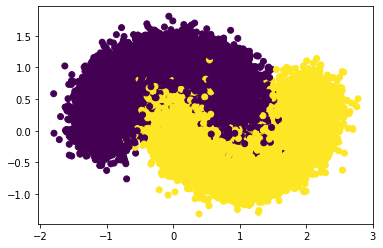

In [4]:
plt.scatter(X[:,0],X[:,1] , c=y)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [7]:
svm_linearsvm = Pipeline([
    ("standared", StandardScaler()),
    ("linearsvm",LinearSVC(C= 10))
])

In [8]:
svm_linearsvm.fit(X_train,y_train)

/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standared', StandardScaler()),
                ('linearsvm', LinearSVC(C=10))])

In [9]:
y_pred = svm_linearsvm.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
acc1 = accuracy_score(y_test,y_pred)

In [12]:
acc1

0.868875

In [13]:
# Now applying the polynomial feature before applying the classification
svm_poly = Pipeline([
    ("polynomial", PolynomialFeatures(degree =3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss= "hinge"))
])

In [14]:
svm_poly.fit(X_train,y_train)

/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [15]:
y_pred2 = svm_poly.predict(X_test)

In [16]:
acc2 = accuracy_score(y_test,y_pred2)

In [17]:
acc2

0.95525

In [18]:
# We can clearly see that the accuracy of the model increase when we apply the polynomialfeatures
# polynomial feature help in making the dataset which is non linear to linear dataset

## Polynomial Kernel

In [19]:
# Adding the polynomial features is simple and can work great with all sorts of Machine Learning
# algorithms (not just SVM). That said, at a low polynomial degree, this method cannot deal with
# very complex datasets, and with a high polyno‐mial degree it creates a huge number of features, 
# making the model too slow

### Kernel trick using the SVC CLASS

In [20]:
from sklearn.svm import SVC

In [21]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel= "poly", degree=3, coef0 =1 , C=5))
])

In [22]:
poly_kernel_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [23]:
pred2= poly_kernel_svm_clf.predict(X_test)

In [24]:
acc3 = accuracy_score(y_test,pred2)

In [25]:
acc3

0.95525

In [26]:
#Unlike linear models that use only original features, the polynomial kernel lets the algorithm consider terms like x12x12​, x1x2x1​x2​, x22x22​, etc., without manually computing them


## Similarity Feature

In [27]:
# Another technique to tackle nonlinear problem is to add features computed using a similarity function,
# which measure how much each instance resembles a particular landmark.

In [28]:
# A similarity function (or similarity measure) is a function that quantifies how alike two objects are.
# A similarity function takes in two inputs(vectors, set string) and outputs a real number
# indicating how similar they are


# What is a kernel

In [29]:
# A kernel is a function that enables the model to operate in a high dimensional feature
# space without explicitily computing the coordinates in that space
#A kernel allows a model to learn non-linear patterns by implicitly transforming the data into a \
# higher-dimensional space where a linear separator or relationship might exist.
# The kernel trick allows the transformation wihout acutally computing the 3D coordiantes which save computation


## Gaussian (RBF) Kernel

In [30]:
# It is a similarity function that measures how close two input vectors x and y are in space 


In [36]:
# Standared scaler  standardizes features zero mean and unit varience
# kernel = rbf kernel which allows the svm to learn non linear decision boundry
# gamma control how far the influence of sinle training example reaches

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C = 1))
])

In [37]:
rbf_kernel_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=5))])

In [38]:
pred_kernel = rbf_kernel_svm_clf.predict(X_test)

In [39]:
acc5 = accuracy_score(y_test,pred_kernel)

In [40]:
acc5

0.9555